In [1]:
from bioio import BioImage
import bioio_ome_tiff
from bioio.writers import OmeTiffWriter


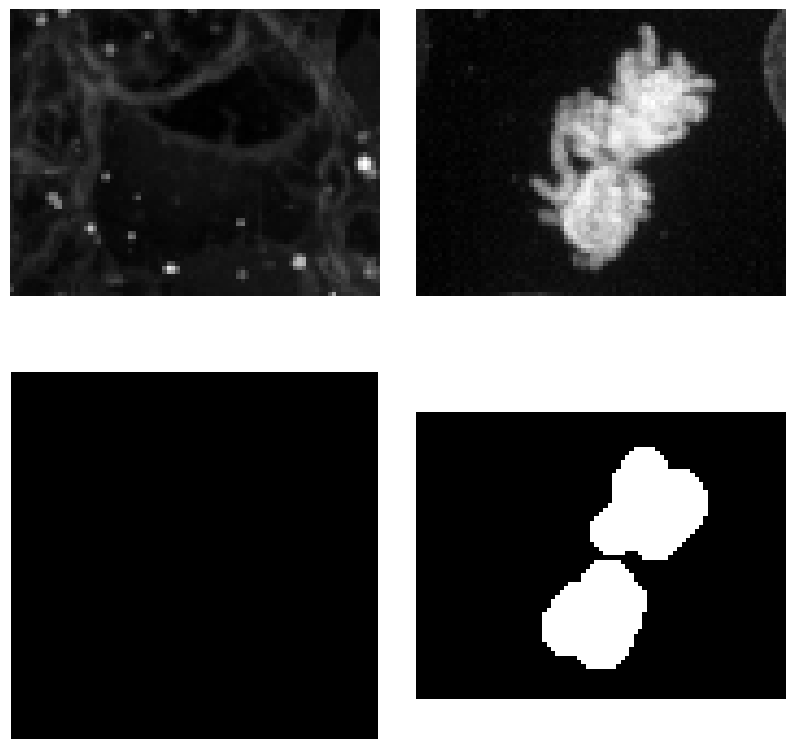

In [10]:
# create a class that can be used to view a set of images
# this is given a list of dictionaries, each of which contains a set of images
# for each image set, there should be a new row, and each image should be a new column

class ImageOverview:
    def __init__(self, image_sets):
        self.image_sets = image_sets
        self.fig, self.axs = self._construct_overview()
        
    def _construct_overview(self):
        import stackview
        import matplotlib.pyplot as plt
        from numpy import zeros
        
        # create the subplot grid
        num_rows = len(self.image_sets)
        num_columns = max(
            [len(image_set['image']) for image_set in self.image_sets]
        )
        
        fig, axs = plt.subplots(
            num_rows, 
            num_columns,
            figsize=(num_columns * 5, num_rows * 5)
        )
        
        if num_rows == 1:
            axs = [axs]
        if num_columns == 1:
            axs = [[ax] for ax in axs]
            
        # iterate through the image sets
        for row, image_set in enumerate(self.image_sets):
            # print(image_set)
            # for col, image in enumerate(image_set):
            for col in range(len(image_set['image'])):
                # create a dictionary from the col-th values of each key in the image set
                image_dict = {key: value[col] for key, value in image_set.items()}
                
                if image_dict['image'] is None:
                    image_dict['image'] = zeros((1,1))
                    
                # create a labels key if it doesn't exist, but does in colormap
                cmap = image_dict.get('colormap')
                if cmap is not None and cmap.lower() == 'labels':
                    image_dict['labels'] = True
                
                stackview.imshow(**image_dict, plot=axs[row][col])
        
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        return fig, axs
    
    def show(self):
        self.fig.show()
    
    def save(self, directory: str = None, filename: str = None, ):
        import pathlib
        dir = pathlib.Path(directory)
        dir.mkdir(parents=True, exist_ok=True)
        filepath = dir / filename
        self.fig.savefig(filepath)
        
        
import numpy as np
       
# Example usage
img = BioImage(
    # r'C:\Users\timmo\Documents\Github\napari-ndev\src\napari_ndev\_tests\resources\Apoc\Images\SPF-4MM-22 slide 9-S6_Top Slide_TR2_p00_0_A01f00d0.tiff'
    r'.\_tests\resources\Workflow\Images\cells3d2ch.tiff'
)
# stackview.imshow(np.squeeze(img.data))
image_data = np.squeeze(img.data)
# reversed_data = np.flip(image_data, axis=0)

image_set1 = {
    'image': [image_data[0], image_data[1]],
    # 'colormap': ['PiYG', 'viridis'],
    # 'title': ['Image 1', 'Image 2'],
}

lbl = BioImage(
    r'.\_tests\resources\Workflow\Labels\cells3d2ch.tiff'
)

label_set = {
    'image': [None, np.squeeze(lbl.data)],
    # 'colormap': [None,'Labels'],
    # 'title': [None,'Labels']
}

overview = ImageOverview([image_set1, label_set])    
# overview.show()
overview.save(directory=r'.\_tests\resources\Workflow\Images', filename='overview.png')
# ImageOverview([image_set1]).show()

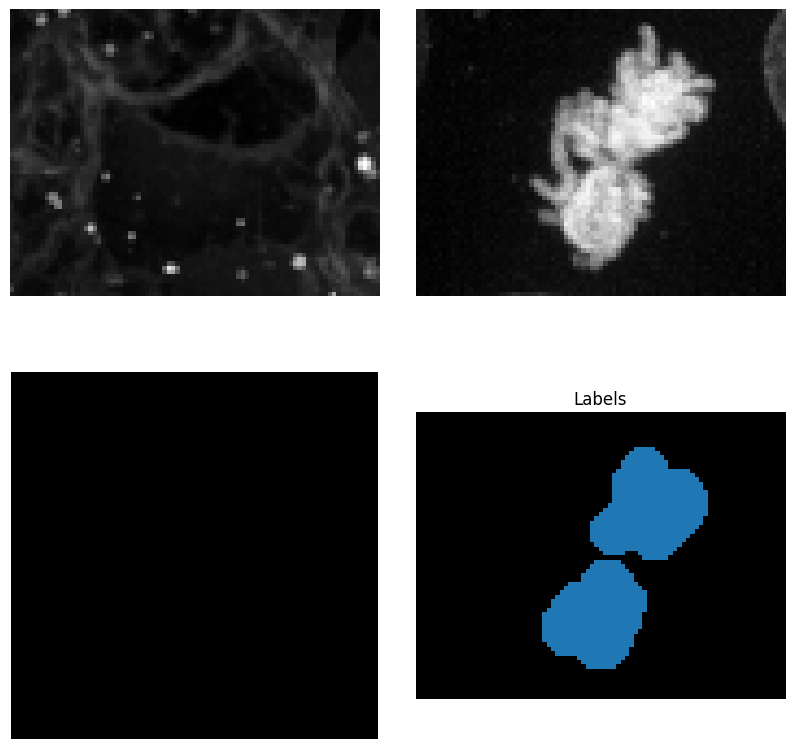

In [3]:
import numpy as np
from napari_ndev import ImageOverview
from bioio import BioImage
# Example usage
img = BioImage(
    # r'C:\Users\timmo\Documents\Github\napari-ndev\src\napari_ndev\_tests\resources\Apoc\Images\SPF-4MM-22 slide 9-S6_Top Slide_TR2_p00_0_A01f00d0.tiff'
    r'.\_tests\resources\Workflow\Images\cells3d2ch.tiff'
)
# stackview.imshow(np.squeeze(img.data))
image_data = np.squeeze(img.data)
# reversed_data = np.flip(image_data, axis=0)

image_set1 = {
    'image': [image_data[0], image_data[1]],
    # 'colormap': ['PiYG', 'viridis'],
    # 'title': ['Image 1', 'Image 2'],
}

lbl = BioImage(
    r'.\_tests\resources\Workflow\Labels\cells3d2ch.tiff'
)

label_set = {
    'image': [None, np.squeeze(lbl.data)],
    'colormap': [None,'Labels'],
    'title': [None,'Labels']
}

overview = ImageOverview([image_set1, label_set])    
# overview.show()
overview.save(directory=r'.\_tests\resources\Workflow\Images', filename='overview.png')
# ImageOverview([image_set1]).show()

In [7]:
import pathlib
pathlib.Path(r'.\_tests\resources\Workflow\Images') / 'overview.png'

WindowsPath('_tests/resources/Workflow/Images/overview.png')

In [53]:
image_set1.get('colormap')

['PiYG', 'viridis']

In [ ]:
# create a class that can be used to view a set of images
# this is given a list of dictionaries, each of which contains a set of images
# for each image set, there should be a new row, and each image should be a new column

class ImageOverview:
    def __init__(self, image_sets):
        self.image_sets = image_sets
        self.fig, self.axs = self._construct_overview()
        
    def _construct_overview(self):
        num_rows = len(self.image_sets)
        num_columns = max(
            [len(image_set['image']) for image_set in self.image_sets]
        )
        
        fig, axs = plt.subplots(
            num_rows, 
            num_columns,
            figsize=(num_columns * 5, num_rows * 5)
        )
        
        if num_rows == 1:
            axs = [axs]
        if num_columns == 1:
            axs = [[ax] for ax in axs]
            
        # iterate through the image sets
        for row, image_set in enumerate(self.image_sets):
            # images = image_set['image']
            # colormap = image_set.get('colormaps', ['gray'] * len(images)) # default to gray for each image if no colormap
            # title = image_set.get('titles', [''] * len(images))
            for col, 
            
            for col, image in enumerate(images):
                stackview.imshow(**image_set, plot=axs[row][col])

        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        return fig, axs
    
    def show(self):
        self.fig.show()
    
    def save(self, directory: str = None, filename: str = None, ):
        dir = pathlib.Path(directory).mkdir(parents=True, exist_ok=True)
        filepath = dir / filename
        self.fig.savefig(filepath)

col=
image=
[[[1981 1909 1948 ... 2828 2723 2812]
  [1911 1742 1886 ... 2820 2762 2574]
  [2058 1795 1938 ... 2618 2624 2841]
  ...
  [1591 1797 1665 ... 3107 3095 3343]
  [1907 1797 1707 ... 2994 3252 3085]
  [1866 1754 1727 ... 2950 3157 3237]]

 [[1866 1961 1919 ... 2558 2882 2750]
  [1915 1824 2008 ... 2946 2828 2977]
  [2083 1731 1791 ... 2837 2775 2797]
  ...
  [1533 1601 1866 ... 3308 3264 2996]
  [1450 1804 1713 ... 3204 3091 3157]
  [1729 1845 1870 ... 3328 3297 2967]]

 [[2132 2070 1884 ... 2531 2545 2886]
  [1965 1990 1932 ... 2500 2799 2913]
  [1886 2097 1967 ... 2773 2830 2628]
  ...
  [1597 1812 1667 ... 3167 3097 2987]
  [1880 1715 1963 ... 3130 3132 3105]
  [1789 1833 1740 ... 3109 3010 2956]]

 ...

 [[1793 1744 1729 ... 1638 1634 1744]
  [1946 1857 1855 ... 1382 1682 1405]
  [1676 1979 1680 ... 1446 1324 1467]
  ...
  [2182 2120 2151 ... 1653 1861 1694]
  [2087 2227 2018 ... 1653 1665 1715]
  [2037 2268 2014 ... 1611 1647 1694]]

 [[1707 1680 1653 ... 1490 1481 1488]


AttributeError: 'list' object has no attribute 'shape'

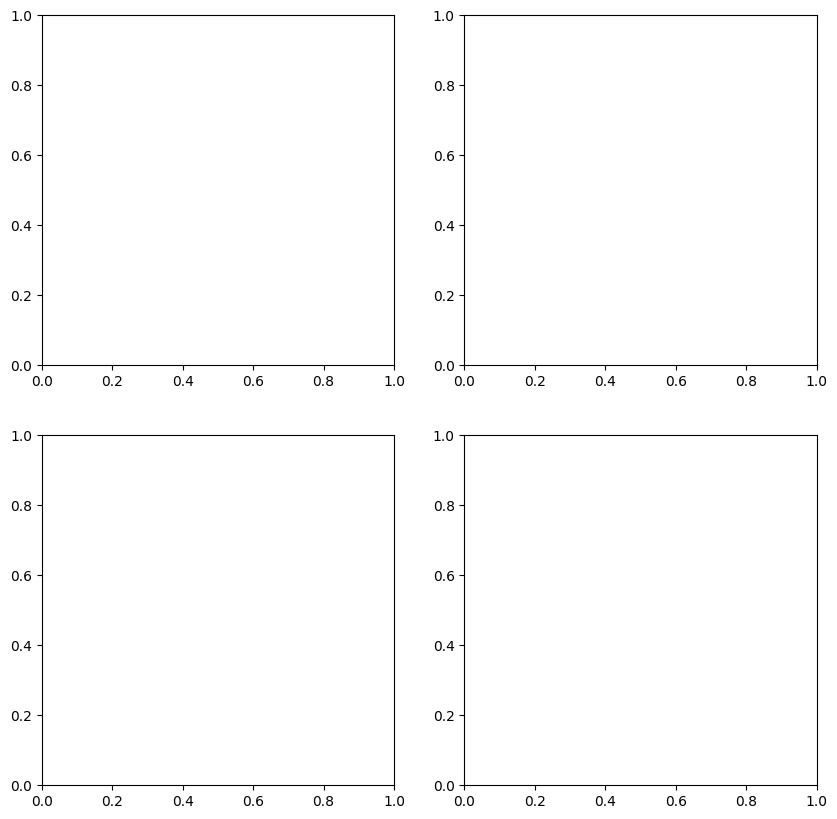

In [82]:
%matplotlib inline

img = BioImage(
    # r'C:\Users\timmo\Documents\Github\napari-ndev\src\napari_ndev\_tests\resources\Apoc\Images\SPF-4MM-22 slide 9-S6_Top Slide_TR2_p00_0_A01f00d0.tiff'
    r'C:\Users\ImageAnalysis\napari-ndev\src\napari_ndev\_tests\resources\Workflow\Images\cells3d2ch.tiff'
)
# stackview.imshow(np.squeeze(img.data))
image_data = np.squeeze(img.data)
# reversed_data = np.flip(image_data, axis=0)

image_set1 = {
    'image': [image_data[0], image_data[1]],
    'colormap': ['PiYG', 'viridis'],
    'title': ['Image 1', 'Image 2']
}

lbl = BioImage(
    r'C:\Users\ImageAnalysis\napari-ndev\src\napari_ndev\_tests\resources\Workflow\Labels\cells3d2ch.tiff'
)

label_set = {
    'image': [None, np.squeeze(lbl.data)],
    'colormap': [None,'Labels'],
    'title': [None,'Labels']
}

overview = ImageOverview([image_set1, label_set])
# overview
# overview.show()

In [70]:
**label_set

SyntaxError: invalid syntax (2152906628.py, line 1)

ValueError: 'PiYg' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

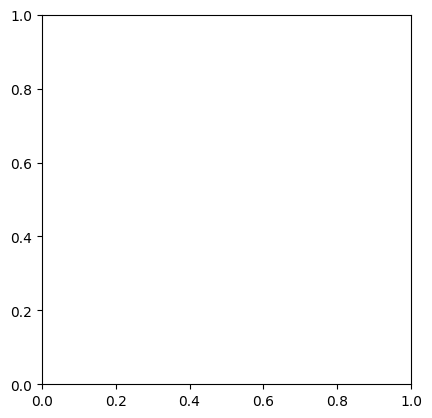

In [21]:
stackview.imshow(image_data[0], title='Image 1', colormap='PiYG')

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

class ImageSet:
    def __init__(self, image_sets):
        self.image_sets = image_sets
        self.fig, self.axs = self._construct_subplot()
    
    def _construct_subplot(self):
        num_rows = len(self.image_sets)
        num_columns = max(len(image_set['images']) for image_set in self.image_sets)
        
        fig, axs = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 5 * num_rows))
        
        if num_rows == 1:
            axs = [axs]
        if num_columns == 1:
            axs = [[ax] for ax in axs]
        
        for row, image_set in enumerate(self.image_sets):
            images = image_set['images']
            colormaps = image_set.get('colormaps', ['gray'] * len(images))
            titles = image_set.get('titles', [''] * len(images))
            
            for col, image in enumerate(images):
                ax = axs[row][col]
                ax.imshow(image, cmap=colormaps[col])
                ax.set_title(titles[col])
                ax.axis('off')
        
        plt.tight_layout()
        return fig, axs

    def display(self):
        # Display the constructed subplot
        plt.show()

    def save(self, filepath):
        # Save the constructed subplot to a file
        # Note: This saves the entire figure as a single image
        self.fig.savefig(filepath)
        print(f"Saved figure to {filepath}")

# Example usage:
# image_sets = [
#     {'images': [img1, img2], 'colormaps': ['gray', 'viridis'], 'titles': ['First', 'Second']},
#     {'images': [img3], 'titles': ['Third']}
# ]
# img_set = ImageSet(image_sets)
# img_set.display()
# img_set.save('path/to/save/overview.png')